# LAB4 : Implement Decision tree algorithm for classification

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import Dataset

In [2]:
dataset =  pd.read_csv('loan_approval_dataset.csv')

## EDA Steps

In [3]:
dataset.head()

,ApplicantIncome,CreditScore,EmploymentStatus,LoanAmount,ExistingDebt,LoanStatus
0,48323,780,Employed,9613,11165,Approved
1,39972,489,Employed,8954,18995,Rejected
2,117967,825,Employed,43400,13534,Approved
3,74865,830,Unemployed,8183,25936,Rejected
4,115422,417,Employed,14959,4533,Rejected


In [4]:
dataset.shape

(1000, 6)

In [5]:
dataset.columns

Index(['ApplicantIncome', 'CreditScore', 'EmploymentStatus', 'LoanAmount',
       'ExistingDebt', 'LoanStatus'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ApplicantIncome   1000 non-null   int64 
 1   CreditScore       1000 non-null   int64 
 2   EmploymentStatus  1000 non-null   object
 3   LoanAmount        1000 non-null   int64 
 4   ExistingDebt      1000 non-null   int64 
 5   LoanStatus        1000 non-null   object
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [7]:
dataset.describe()

,ApplicantIncome,CreditScore,LoanAmount,ExistingDebt
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,86086.773000,578.954000,27940.26000,19790.974000
std,37516.684986,160.654286,13142.00997,11466.708553
min,20047.000000,300.000000,5063.00000,34.000000
25%,52322.750000,440.000000,16821.75000,9968.250000
50%,87832.000000,578.000000,27464.50000,19731.000000
75%,118737.000000,714.000000,39986.25000,29314.000000
max,149880.000000,849.000000,49945.00000,39924.000000


In [8]:
# categorical features
dataset.describe(include = 'object')

,EmploymentStatus,LoanStatus
count,1000,1000
unique,3,2
top,Self-Employed,Rejected
freq,342,828


## Preprocessing Steps

## Step 1 : Separate input and output variables

In [9]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [10]:
print(X)

     ApplicantIncome  CreditScore EmploymentStatus  LoanAmount  ExistingDebt
0              48323          780         Employed        9613         11165
1              39972          489         Employed        8954         18995
2             117967          825         Employed       43400         13534
3              74865          830       Unemployed        8183         25936
4             115422          417         Employed       14959          4533
..               ...          ...              ...         ...           ...
995           125855          829         Employed       30007           533
996           110470          753    Self-Employed        5538          4261
997            40419          822         Employed       33510         32393
998            67499          310    Self-Employed       25160          5639
999           105128          734    Self-Employed       16962         27218

[1000 rows x 5 columns]


### Step 3 : Encoding categorical data

#### A. Encoding the Independent Variable (i/p feature/X)

In X we have EmploymentStatus
Hence used One hot encoder

In [11]:
X['EmploymentStatus'].value_counts()

EmploymentStatus
Self-Employed    342
Unemployed       341
Employed         317
Name: count, dtype: int64

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',
                                      OneHotEncoder(), 
                                      [2])], 
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Step 4 : splitting Data into training and testing

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,
                                    test_size = 0.25,
                                    random_state = 0)

In [14]:
print(X_train.shape)
print(X_test.shape)

(750, 7)
(250, 7)


In [15]:
print(X_test)

[[0.0000e+00 1.0000e+00 0.0000e+00 ... 7.0700e+02 6.2010e+03 5.9190e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 6.6000e+02 2.8847e+04 2.7844e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 3.4100e+02 1.0332e+04 8.9170e+03]
 ...
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 8.2500e+02 4.3400e+04 1.3534e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 5.1700e+02 8.4600e+03 1.2042e+04]
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 6.0300e+02 4.9200e+04 3.9369e+04]]


### Train the Decision Tree Classification model on the Training set

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state= 41,
                                    splitter='random',ccp_alpha =0.0001)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', random_state=41,
                       splitter='random')

In [17]:
print(classifier.classes_)

['Approved' 'Rejected']


In [18]:
classifier.max_features_

7

In [19]:
classifier.tree_

In [20]:
classifier.n_outputs_

1

#### Predicting the Test set results

In [21]:
ypred = classifier.predict(X_test)

In [22]:
print(ypred)

['Approved' 'Rejected' 'Rejected' 'Rejected' 'Rejected' 'Rejected'
 'Rejected' 'Rejected' 'Rejected' 'Rejected' 'Rejected' 'Rejected'
 'Rejected' 'Rejected' 'Rejected' 'Rejected' 'Rejected' 'Approved'
 'Rejected' 'Rejected' 'Rejected' 'Rejected' 'Rejected' 'Rejected'
 'Rejected' 'Rejected' 'Approved' 'Rejected' 'Approved' 'Rejected'
 'Rejected' 'Approved' 'Approved' 'Rejected' 'Rejected' 'Rejected'
 'Rejected' 'Rejected' 'Approved' 'Rejected' 'Rejected' 'Approved'
 'Rejected' 'Rejected' 'Rejected' 'Rejected' 'Rejected' 'Rejected'
 'Rejected' 'Rejected' 'Approved' 'Rejected' 'Approved' 'Rejected'
 'Rejected' 'Approved' 'Rejected' 'Approved' 'Rejected' 'Rejected'
 'Rejected' 'Approved' 'Rejected' 'Rejected' 'Rejected' 'Rejected'
 'Rejected' 'Rejected' 'Rejected' 'Rejected' 'Rejected' 'Rejected'
 'Rejected' 'Approved' 'Rejected' 'Rejected' 'Rejected' 'Rejected'
 'Approved' 'Rejected' 'Rejected' 'Rejected' 'Rejected' 'Rejected'
 'Rejected' 'Rejected' 'Rejected' 'Rejected' 'Rejected' 'Rejec

#### Compare the predicted and Actual Output

In [23]:
print(np.concatenate((
    ypred.reshape(-1, 1),
    np.array(y_test).reshape(-1, 1)
), axis=1))

[['Approved' 'Approved']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Approved' 'Approved']
 ['Rejected' 'Rejected']
 ['Rejected' 'Approved']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Approved' 'Approved']
 ['Rejected' 'Rejected']
 ['Approved' 'Approved']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Approved' 'Approved']
 ['Approved' 'Approved']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Approved' 'Rejected']
 ['Rejected' 'Rejected']


### Making the Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)
print(cm)

[[ 37   2]
 [ 11 200]]


In [25]:
print("Accuracy =",(38+209)/343*100)

Accuracy = 72.01166180758017


In [26]:
from sklearn.metrics import accuracy_score
print("Test Accuracy =",accuracy_score(y_test,ypred))

Test Accuracy = 0.948


#### Build the Classification Report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

    Approved       0.77      0.95      0.85        39
    Rejected       0.99      0.95      0.97       211

    accuracy                           0.95       250
   macro avg       0.88      0.95      0.91       250
weighted avg       0.96      0.95      0.95       250



### Visualising the Training set results

#### VISUALIZE TEXT REPRESENTATION

In [28]:
!pip install -U scikit-learn

In [29]:
## if not working update scikit learn package
## !pip install -U scikit-learn
from sklearn.tree import export_text
text_representation = export_text(classifier)
print(text_representation)

|--- feature_4 <= 634.41
|   |--- class: Rejected
|--- feature_4 >  634.41
|   |--- feature_2 <= 0.29
|   |   |--- feature_3 <= 76067.59
|   |   |   |--- feature_3 <= 36246.23
|   |   |   |   |--- class: Rejected
|   |   |   |--- feature_3 >  36246.23
|   |   |   |   |--- feature_1 <= 0.84
|   |   |   |   |   |--- feature_6 <= 22708.42
|   |   |   |   |   |   |--- feature_4 <= 701.14
|   |   |   |   |   |   |   |--- class: Approved
|   |   |   |   |   |   |--- feature_4 >  701.14
|   |   |   |   |   |   |   |--- feature_4 <= 774.10
|   |   |   |   |   |   |   |   |--- class: Approved
|   |   |   |   |   |   |   |--- feature_4 >  774.10
|   |   |   |   |   |   |   |   |--- feature_5 <= 38942.54
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 823.19
|   |   |   |   |   |   |   |   |   |   |--- class: Approved
|   |   |   |   |   |   |   |   |   |--- feature_4 >  823.19
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 829.64
|   |   |   |   |   |   |   |   |   |   |   |--- 

### Visualize the tree

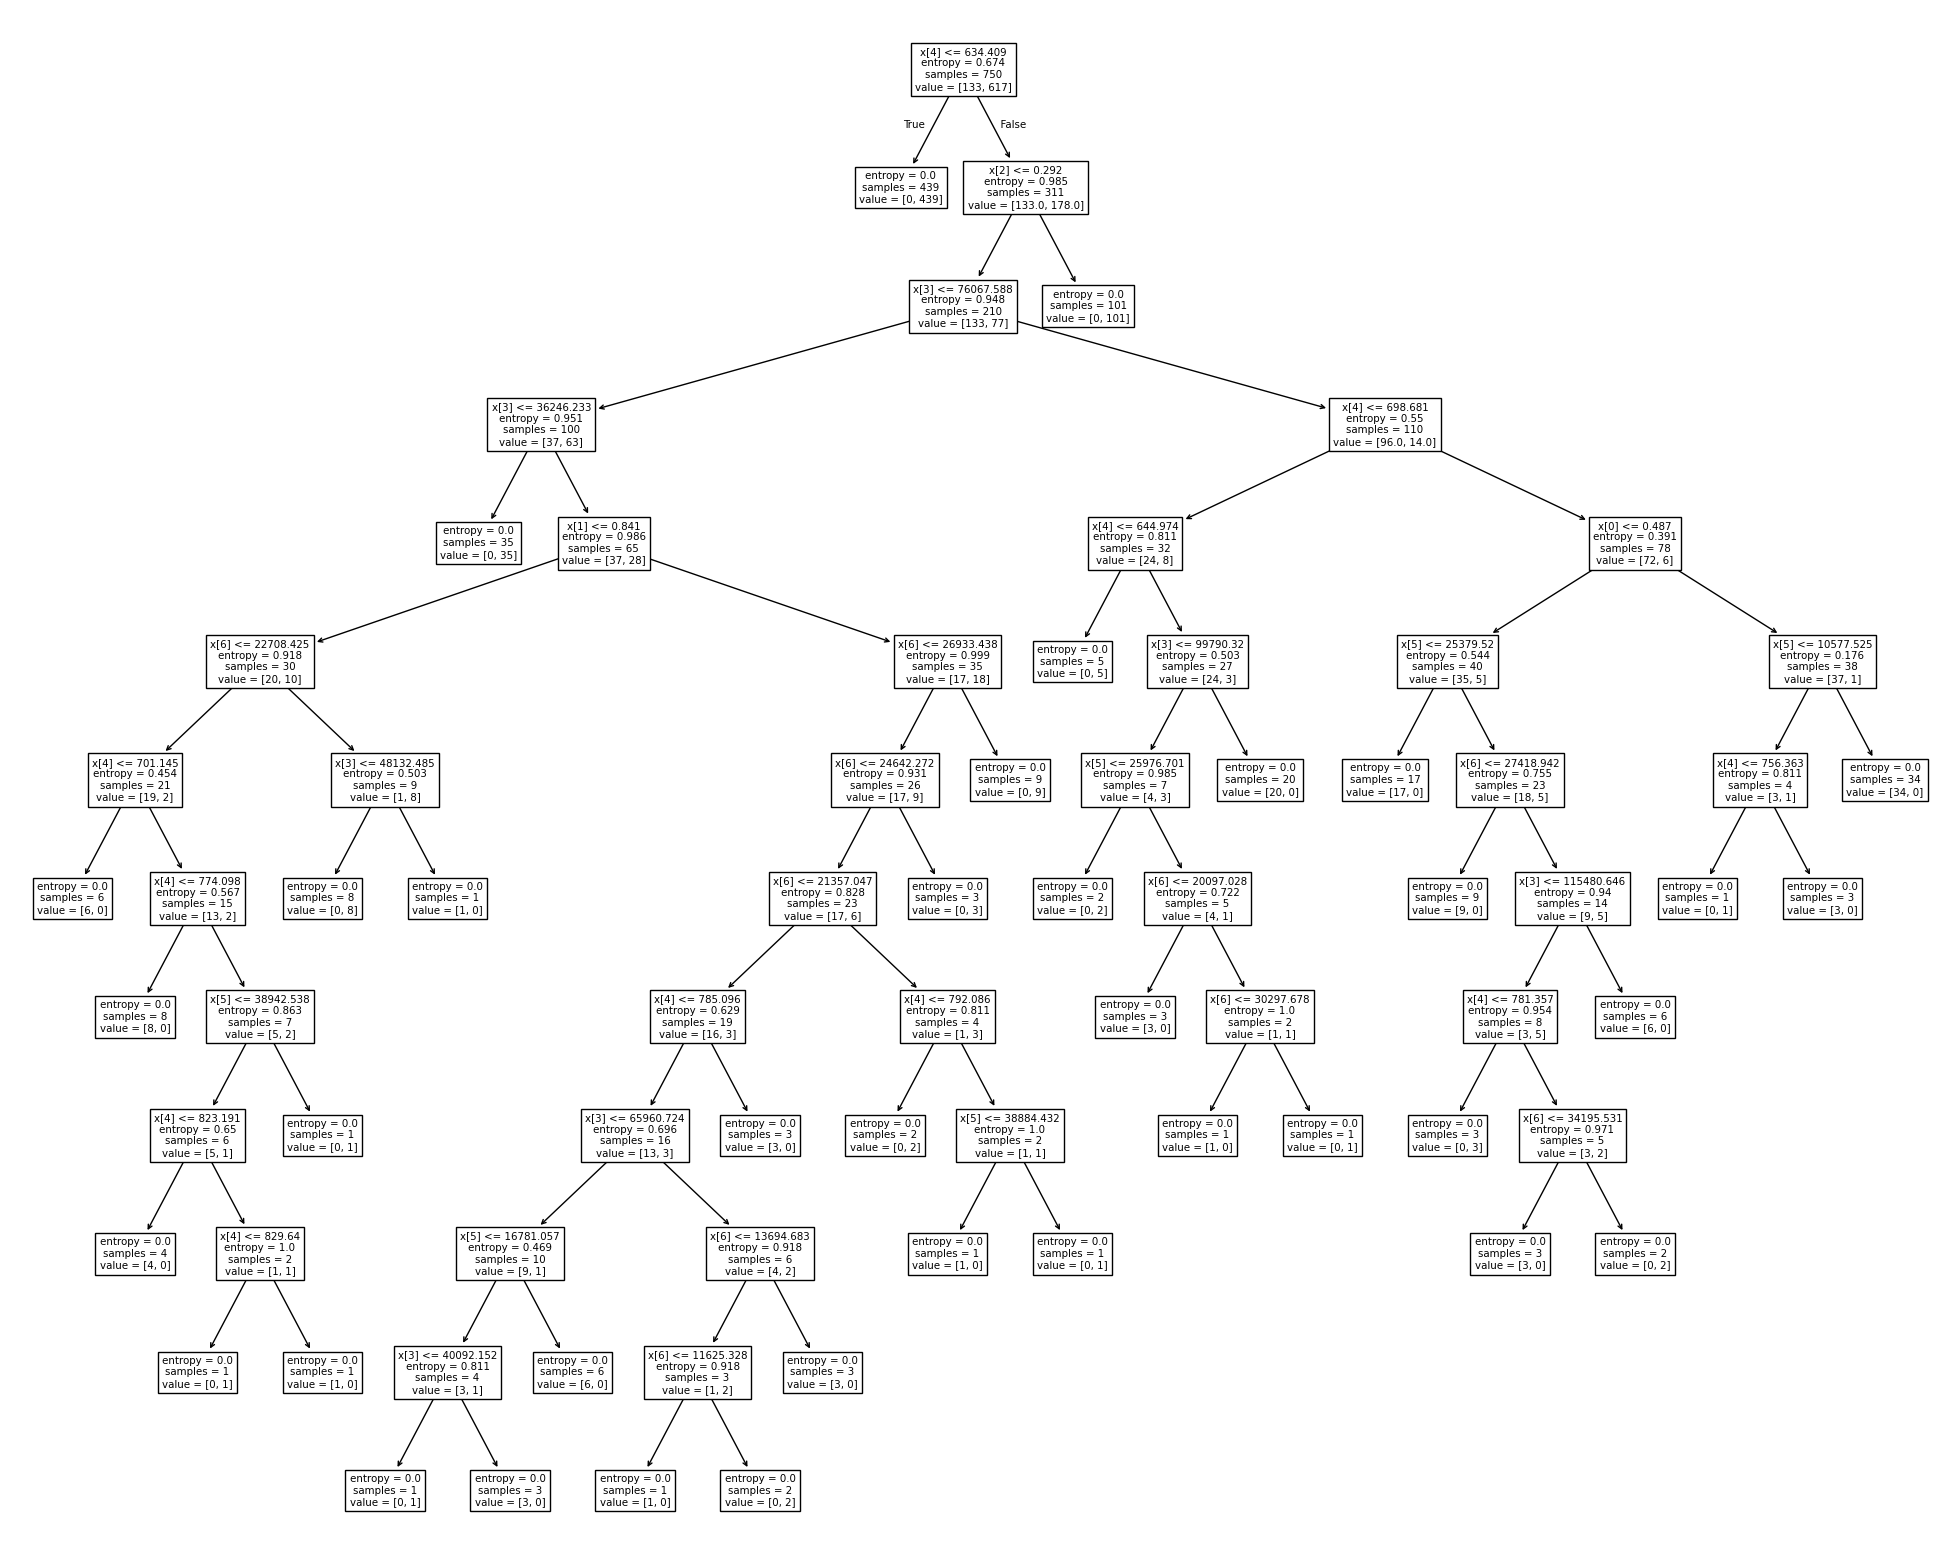

In [30]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier)
plt.show()